## Importing libraries

In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [2]:
d = pd.read_csv("weatherAUS.csv")

## Preview Loaded data

In [3]:
d.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
d.shape

(142193, 24)

# Data Information

## Checking null values

In [5]:
d.drop('RISK_MM',inplace=True,axis=1)

In [6]:
d.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

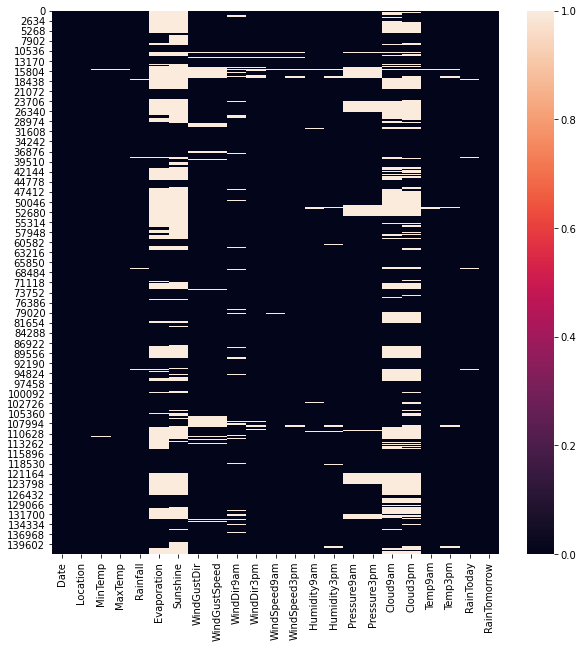

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(d.isnull())
plt.show()

In [10]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

## Treating Major Null values i.e Null values>30%

In [11]:
def randomsampleimputation(data, variable):
    d[variable]=d[variable]
    random_sample=d[variable].dropna().sample(d[variable].isnull().sum(),random_state=0)
    random_sample.index=d[d[variable].isnull()].index
    d.loc[d[variable].isnull(),variable]=random_sample

In [12]:
randomsampleimputation(d, "Cloud9am")
randomsampleimputation(d, "Cloud3pm")
randomsampleimputation(d, "Evaporation")
randomsampleimputation(d, "Sunshine")

In [13]:
d.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,142193.000000,142193.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,142193.000000,142193.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.468387,7.626590,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.435830,4.505587,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.185773,3.781062,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887023,2.720169,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


## Data info after treating null values

In [14]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    142193 non-null  float64
 6   Sunshine       142193 non-null  float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       142193 non-nul

In [15]:
d['DateTime']= pd.to_datetime(d['Date'].copy())

In [16]:
d['Year']=d['DateTime'].dt.year
d['Month']= d['DateTime'].dt.month.apply(str)
d['Day']= d['DateTime'].dt.day

In [17]:
d

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,DateTime,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,6.2,3.3,W,44.0,W,...,8.0,5.0,16.9,21.8,No,No,2008-12-01,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,0.4,6.1,WNW,44.0,NNW,...,5.0,1.0,17.2,24.3,No,No,2008-12-02,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,5.8,9.7,WSW,46.0,W,...,1.0,2.0,21.0,23.2,No,No,2008-12-03,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,1.4,12.2,NE,24.0,SE,...,7.0,7.0,18.1,26.5,No,No,2008-12-04,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,6.6,1.0,W,41.0,ENE,...,7.0,8.0,17.8,29.7,No,No,2008-12-05,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,16.0,6.6,E,31.0,ESE,...,7.0,7.0,9.4,20.9,No,No,2017-06-20,2017,6,20
142189,2017-06-21,Uluru,2.8,23.4,0.0,1.0,11.4,E,31.0,SE,...,1.0,8.0,10.1,22.4,No,No,2017-06-21,2017,6,21
142190,2017-06-22,Uluru,3.6,25.3,0.0,6.7,2.4,NNW,22.0,SE,...,7.0,0.0,10.9,24.5,No,No,2017-06-22,2017,6,22
142191,2017-06-23,Uluru,5.4,26.9,0.0,5.6,0.0,N,37.0,SE,...,0.0,8.0,12.5,26.1,No,No,2017-06-23,2017,6,23


In [21]:
numerical_feature = [feature for feature in d.columns if d[feature].dtypes != 'O']
numerical_feature.remove('Day')
numerical_feature.remove('Year')
numerical_feature.remove('DateTime')
discrete_feature=[feature for feature in numerical_feature if len(d[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in d.columns if feature not in numerical_feature]
print("Numerical Features Count ",len(numerical_feature))
print("Discrete feature Count",len(discrete_feature))
print("Continuous feature Count",len(continuous_feature))
print("Categorical feature Count",len(categorical_feature))

categorical_feature.remove('Date')
categorical_feature.remove('Year')
categorical_feature.remove('Month')
categorical_feature.remove('Day')
categorical_feature.remove('DateTime')
categorical_feature

Numerical Features Count  16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 11


['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [22]:
numerical_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [23]:
categorical_feature

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

# Exploratory Data Analysis

In [ ]:
loc_rain = d[d['RainTomorrow'] == 'Yes'].groupby('Location').count().reset_index().sort_values(by=['RainTomorrow'], ascending=False)

sns.barplot(x="RainTomorrow", y="Location", data=loc_rain, palette="Blues_d")

<AxesSubplot:xlabel='RainTomorrow', ylabel='Month'>

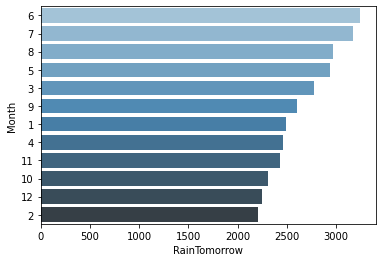

In [25]:
rainy_Days = d[d['RainTomorrow']=='Yes'].groupby('Month').count().reset_index().sort_values(by=['RainTomorrow'], ascending=False)

sns.barplot(y="Month", x='RainTomorrow', data=rainy_Days,palette='Blues_d')




<AxesSubplot:xlabel='RainTomorrow', ylabel='Location'>

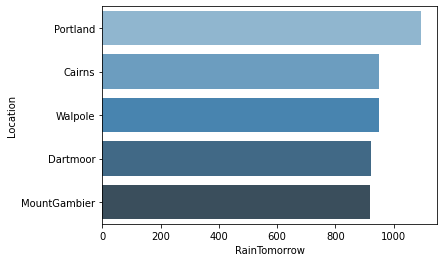

In [26]:
Rainy_locations = d[d['RainTomorrow']=='Yes'].groupby('Location').count().reset_index().sort_values(by=['RainTomorrow'], ascending=False)
sns.barplot(y="Location", x='RainTomorrow', data=Rainy_locations.head(),palette='Blues_d')

<AxesSubplot:>

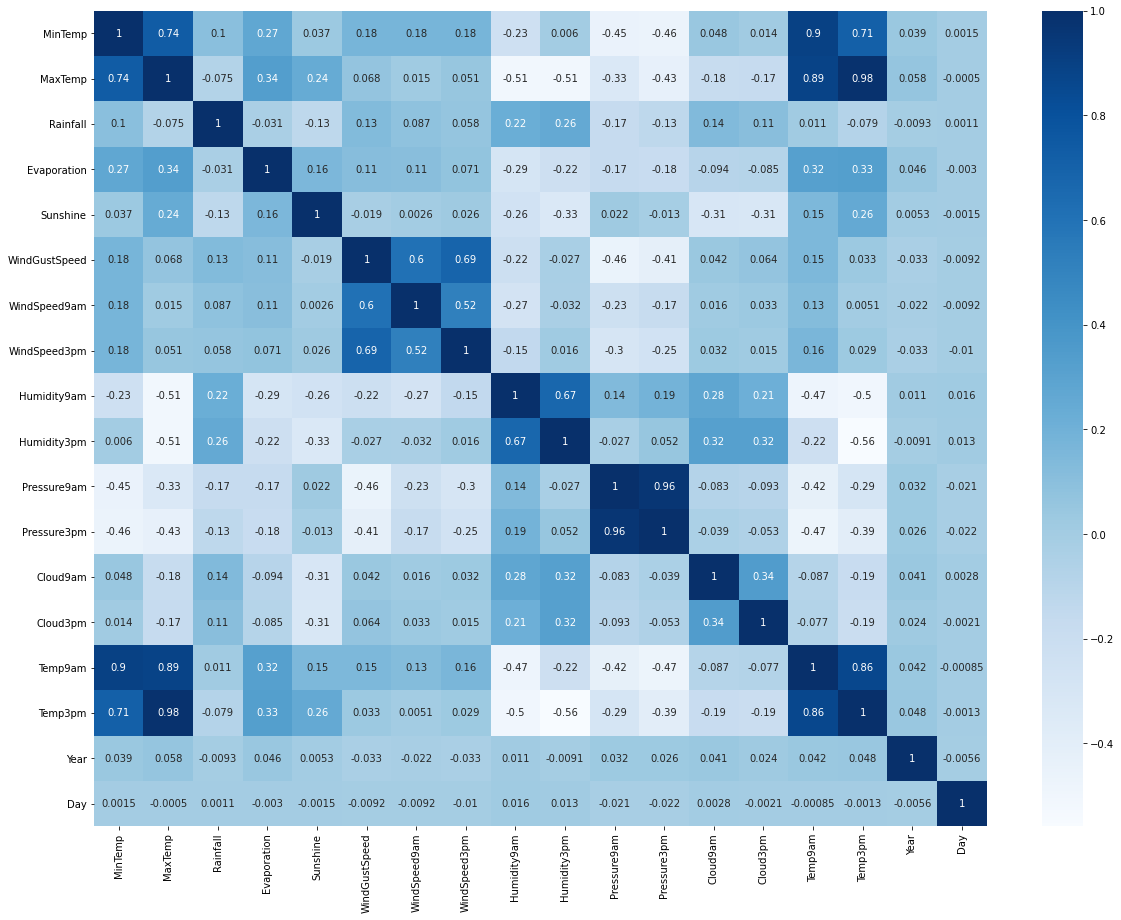

In [27]:
correlation = d.corr(method="pearson")
plt.figure(figsize=(20,15))
sns.heatmap(correlation,annot=True,cmap='Blues')

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


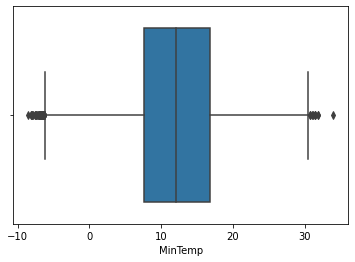

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


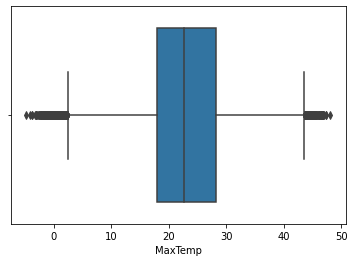

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


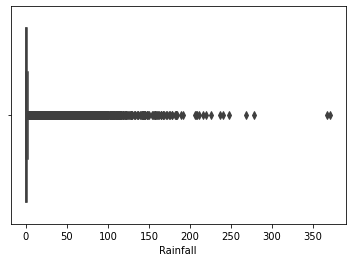

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


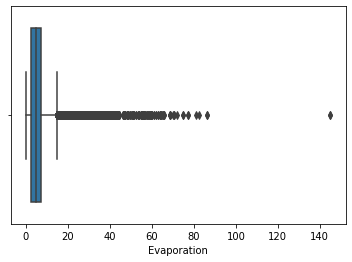

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


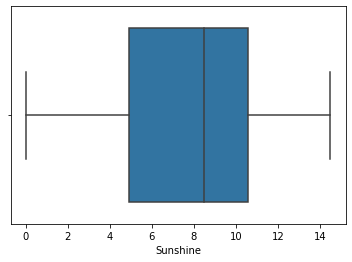

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


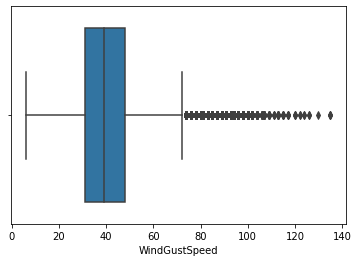

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


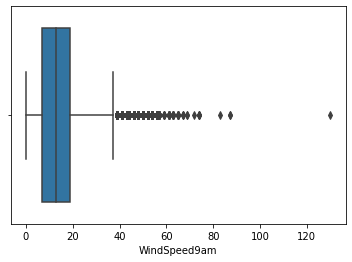

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


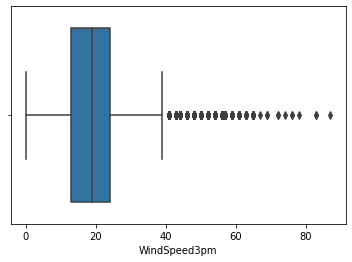

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


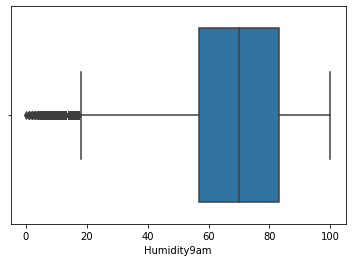

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


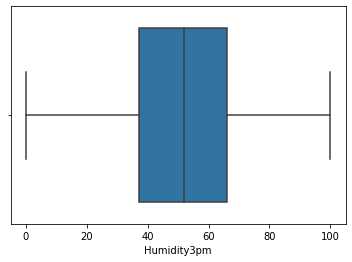

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


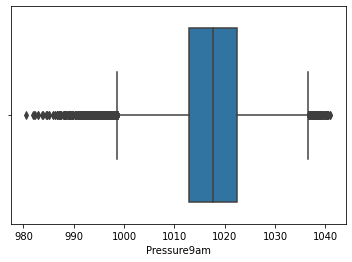

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


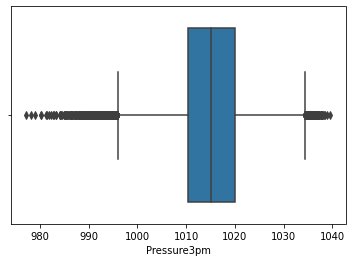

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


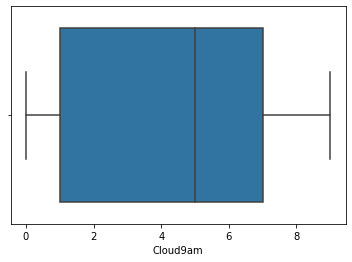

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


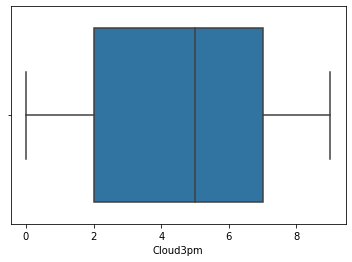

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


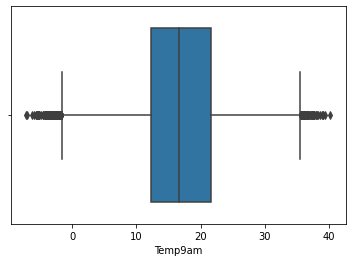

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


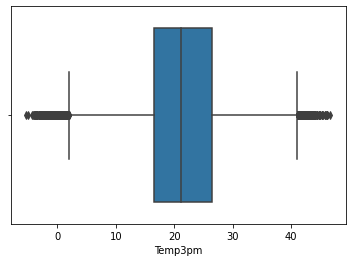

In [28]:
for i in d.columns:
    if i in numerical_feature:

        sns.boxplot(d[i])
        plt.show()

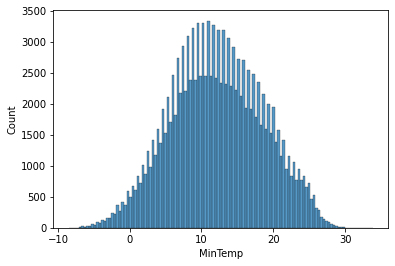

<Figure size 1080x1080 with 0 Axes>

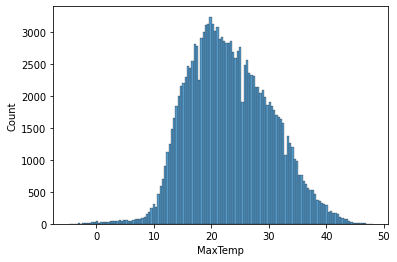

<Figure size 1080x1080 with 0 Axes>

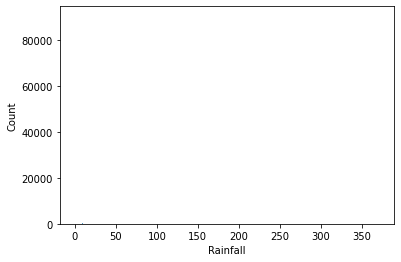

<Figure size 1080x1080 with 0 Axes>

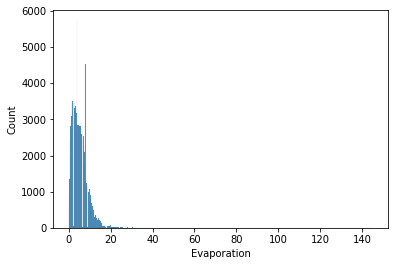

<Figure size 1080x1080 with 0 Axes>

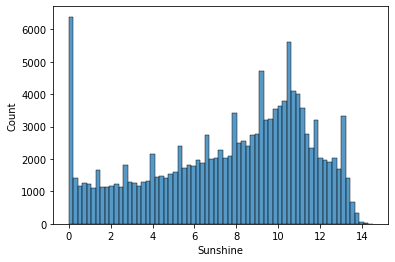

<Figure size 1080x1080 with 0 Axes>

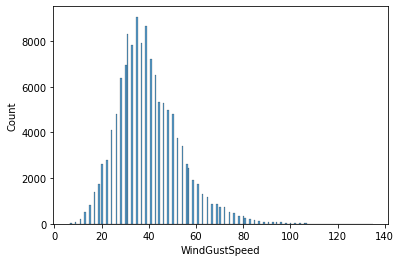

<Figure size 1080x1080 with 0 Axes>

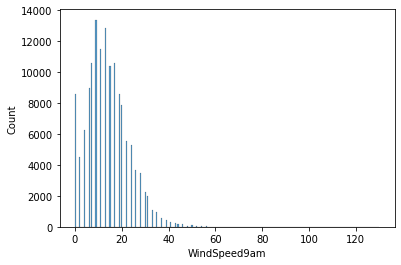

<Figure size 1080x1080 with 0 Axes>

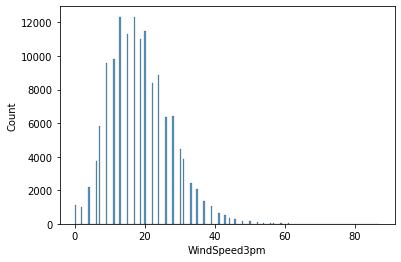

<Figure size 1080x1080 with 0 Axes>

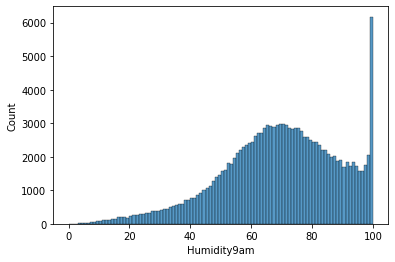

<Figure size 1080x1080 with 0 Axes>

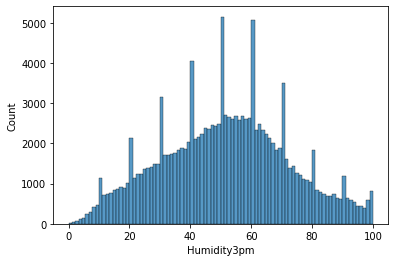

<Figure size 1080x1080 with 0 Axes>

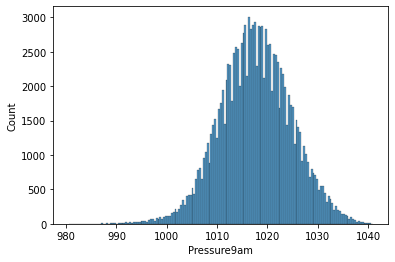

<Figure size 1080x1080 with 0 Axes>

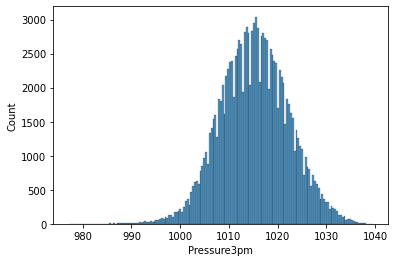

<Figure size 1080x1080 with 0 Axes>

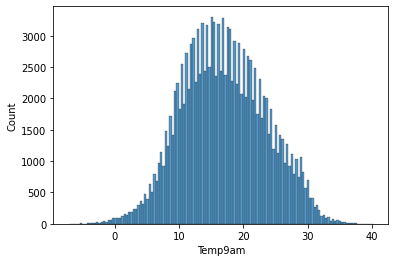

<Figure size 1080x1080 with 0 Axes>

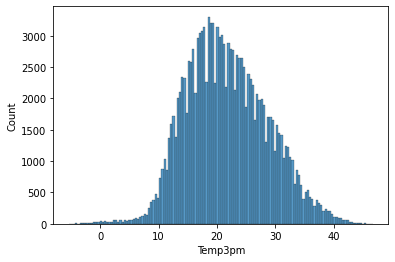

<Figure size 1080x1080 with 0 Axes>

In [30]:
for i in continuous_feature:
    
    sns.histplot(d[i])
    
    
    plt.figure(figsize=(15,15))
    plt.show()

In [31]:
d.isnull().sum()*100/len(d)

Date             0.000000
Location         0.000000
MinTemp          0.447983
MaxTemp          0.226453
Rainfall         0.988797
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      6.561504
WindGustSpeed    6.519308
WindDir9am       7.041838
WindDir3pm       2.656952
WindSpeed9am     0.948007
WindSpeed3pm     1.849599
Humidity9am      1.247600
Humidity3pm      2.538803
Pressure9am      9.855619
Pressure3pm      9.832411
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.635756
Temp3pm          1.917113
RainToday        0.988797
RainTomorrow     0.000000
DateTime         0.000000
Year             0.000000
Month            0.000000
Day              0.000000
dtype: float64

## Treating Minor null values with median

In [32]:
for feature in continuous_feature:
    if(d[feature].isnull().sum()*100/len(d))>0:
        d[feature] = d[feature].fillna(d[feature].median())

In [33]:
d.isnull().sum()*100/len(d)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      6.561504
WindGustSpeed    0.000000
WindDir9am       7.041838
WindDir3pm       2.656952
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        0.988797
RainTomorrow     0.000000
DateTime         0.000000
Year             0.000000
Month            0.000000
Day              0.000000
dtype: float64

In [34]:
continuous_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

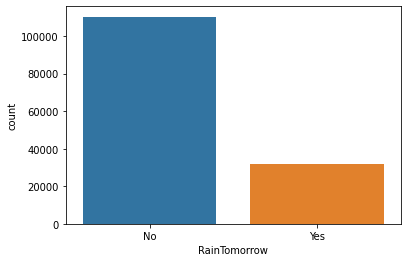

In [35]:
sns.countplot(x="RainTomorrow",data=d)

# Feature Engineering

In [36]:
d

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,DateTime,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,6.2,3.3,W,44.0,W,...,8.0,5.0,16.9,21.8,No,No,2008-12-01,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,0.4,6.1,WNW,44.0,NNW,...,5.0,1.0,17.2,24.3,No,No,2008-12-02,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,5.8,9.7,WSW,46.0,W,...,1.0,2.0,21.0,23.2,No,No,2008-12-03,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,1.4,12.2,NE,24.0,SE,...,7.0,7.0,18.1,26.5,No,No,2008-12-04,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,6.6,1.0,W,41.0,ENE,...,7.0,8.0,17.8,29.7,No,No,2008-12-05,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,16.0,6.6,E,31.0,ESE,...,7.0,7.0,9.4,20.9,No,No,2017-06-20,2017,6,20
142189,2017-06-21,Uluru,2.8,23.4,0.0,1.0,11.4,E,31.0,SE,...,1.0,8.0,10.1,22.4,No,No,2017-06-21,2017,6,21
142190,2017-06-22,Uluru,3.6,25.3,0.0,6.7,2.4,NNW,22.0,SE,...,7.0,0.0,10.9,24.5,No,No,2017-06-22,2017,6,22
142191,2017-06-23,Uluru,5.4,26.9,0.0,5.6,0.0,N,37.0,SE,...,0.0,8.0,12.5,26.1,No,No,2017-06-23,2017,6,23


In [37]:
IQR=d.MinTemp.quantile(0.75)-d.MinTemp.quantile(0.25)
lower_bridge=d.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=d.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)


-6.200000000000001 30.6


In [38]:
d.loc[d['MinTemp']>=30.6,'MinTemp']=30.6
d.loc[d['MinTemp']<=-6.20,'MinTemp']=-6.20


In [39]:
IQR=d.MaxTemp.quantile(0.75)-d.MaxTemp.quantile(0.25)
lower_bridge=d.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=d.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)


2.4499999999999975 43.65


In [40]:
d.loc[d['MaxTemp']>=43.65,'MaxTemp']=43.65
d.loc[d['MaxTemp']<=2.44,'MaxTemp']=2.44


In [41]:
IQR=d.Rainfall.quantile(0.75)-d.Rainfall.quantile(0.25)
lower_bridge=d.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=d.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)


-0.8999999999999999 1.5


In [42]:
d.loc[d['Rainfall']>=2.0,'Rainfall']=2.0
d.loc[d['Rainfall']<=-1.20,'Rainfall']=-1.20


In [43]:
IQR=d.Evaporation.quantile(0.75)-d.Evaporation.quantile(0.25)
lower_bridge=d.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=d.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)


-4.600000000000001 14.600000000000001


In [44]:
d.loc[d['Evaporation']>=14.60,'Evaporation']=14.60
d.loc[d['Evaporation']<=-4.60,'Evaporation']=-4.60


In [45]:
IQR=d.WindGustSpeed.quantile(0.75)-d.WindGustSpeed.quantile(0.25)
lower_bridge=d.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=d.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)


8.5 68.5


In [46]:
d.loc[d['WindGustSpeed']>=73.5,'WindGustSpeed']=73.5
d.loc[d['WindGustSpeed']<=5.5,'WindGustSpeed']=5.5


In [47]:
IQR=d.WindSpeed9am.quantile(0.75)-d.WindSpeed9am.quantile(0.25)
lower_bridge=d.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=d.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-11.0 37.0


In [48]:
d.loc[d['WindSpeed9am']>=37,'WindSpeed9am']=37
d.loc[d['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [49]:
IQR=d.WindSpeed3pm.quantile(0.75)-d.WindSpeed3pm.quantile(0.25)
lower_bridge=d.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=d.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)



-3.5 40.5


In [50]:
d.loc[d['WindSpeed3pm']>=40.5,'WindSpeed3pm']=40.5
d.loc[d['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5


In [51]:

IQR=d.Humidity9am.quantile(0.75)-d.Humidity9am.quantile(0.25)
lower_bridge=d.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=d.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

18.0 122.0


In [52]:
d.loc[d['Humidity9am']>=122.0,'Humidity9am']=122.0
d.loc[d['Humidity9am']<18.0,'Humidity9am']=18.0


In [53]:
IQR=d.Pressure9am.quantile(0.75)-d.Pressure9am.quantile(0.25)
lower_bridge= d['Pressure9am'].quantile(0.75)+(IQR*1.5)
lower_bridge= d['Pressure9am'].quantile(0.25)-(IQR*1.5)
print(lower_bridge,upper_bridge)



1001.0500000000001 122.0


In [54]:

d.loc[d['Pressure9am']>=1036.65,'Pressure9am']=1036.65
d.loc[d['Pressure9am']<=998.65,'Pressure9am']=998.65

In [55]:
IQR=d.Pressure3pm.quantile(0.75)-d.Pressure3pm.quantile(0.25)
#IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge = d.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge = d.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge,upper_bridge)


998.4000000000001 1032.0


In [56]:
d.loc[d['Pressure3pm']>=1034.4,'Pressure3pm']=1034.4
d.loc[d['Pressure3pm']<=996.0,'Pressure3pm']=996.0

In [57]:
IQR=d.Temp9am.quantile(0.75)-d.Temp9am.quantile(0.25)
lower_bridge=d.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=d.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.4999999999999982 35.3


In [58]:
d.loc[d['Temp9am']>=35.55,'Temp9am']=35.55
d.loc[d['Temp9am']<=-1.65,'Temp9am']=-1.65

In [59]:
IQR=d.Temp3pm.quantile(0.75)-d.Temp3pm.quantile(0.25)
lower_bridge=d.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=d.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.299999999999997 40.7


In [60]:
d.loc[d['Temp3pm']>=41.09,'Temp3pm']=41.09
d.loc[d['Temp3pm']<1.90,'Temp3pm']=1.90

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


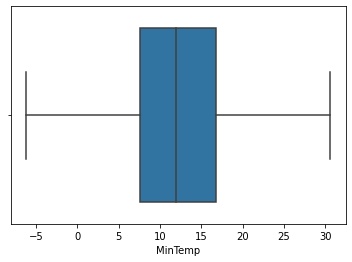

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


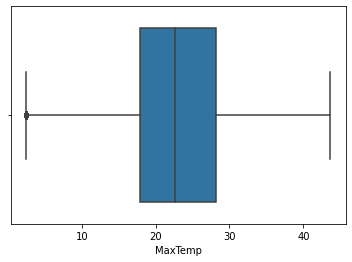

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


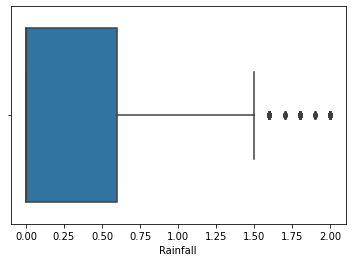

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


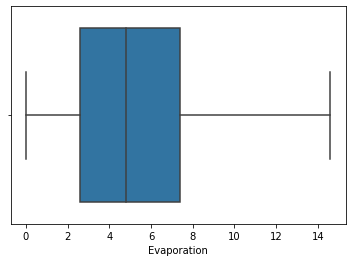

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


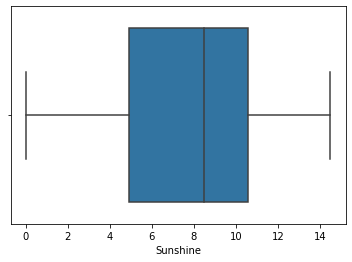

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


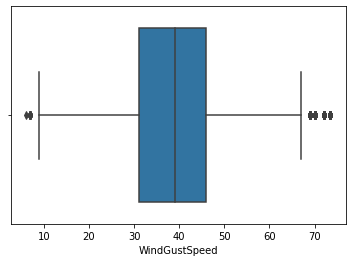

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


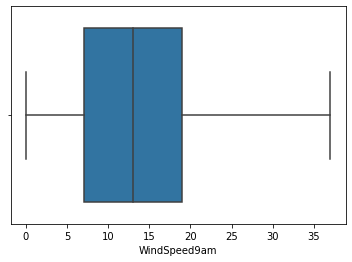

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


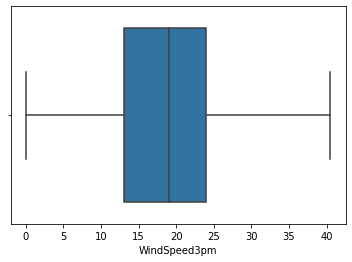

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


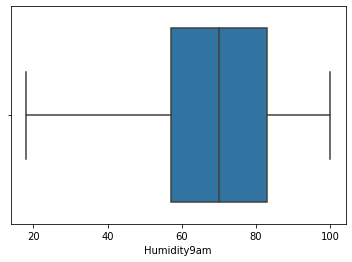

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


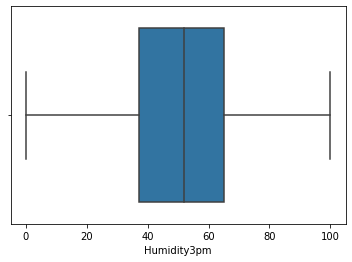

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


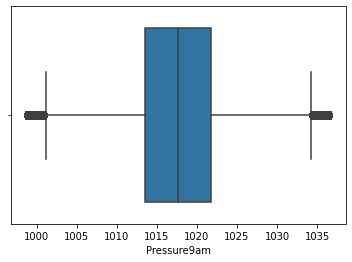

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


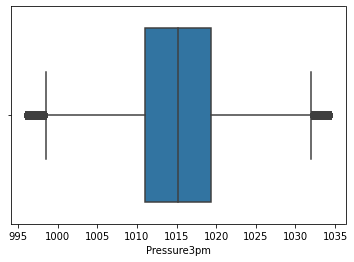

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


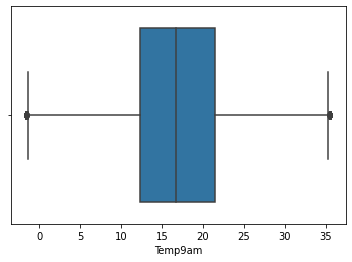

D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


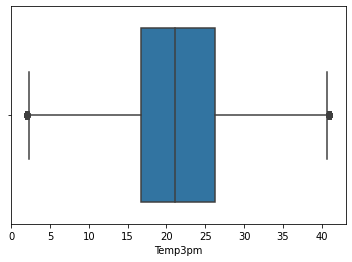

In [61]:
for i in continuous_feature:
    sns.boxplot(d[i])
    plt.show()

In [62]:
d.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RainTomorrow         0
DateTime             0
Year                 0
Month                0
Day                  0
dtype: int64

In [63]:
continuous_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [64]:

d["RainToday"] = pd.get_dummies(d["RainToday"], drop_first = True)
d["RainTomorrow"] = pd.get_dummies(d["RainTomorrow"], drop_first = True)
d

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,DateTime,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,6.2,3.3,W,44.0,W,...,8.0,5.0,16.9,21.8,0,0,2008-12-01,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,0.4,6.1,WNW,44.0,NNW,...,5.0,1.0,17.2,24.3,0,0,2008-12-02,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,5.8,9.7,WSW,46.0,W,...,1.0,2.0,21.0,23.2,0,0,2008-12-03,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,1.4,12.2,NE,24.0,SE,...,7.0,7.0,18.1,26.5,0,0,2008-12-04,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,6.6,1.0,W,41.0,ENE,...,7.0,8.0,17.8,29.7,0,0,2008-12-05,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,14.6,6.6,E,31.0,ESE,...,7.0,7.0,9.4,20.9,0,0,2017-06-20,2017,6,20
142189,2017-06-21,Uluru,2.8,23.4,0.0,1.0,11.4,E,31.0,SE,...,1.0,8.0,10.1,22.4,0,0,2017-06-21,2017,6,21
142190,2017-06-22,Uluru,3.6,25.3,0.0,6.7,2.4,NNW,22.0,SE,...,7.0,0.0,10.9,24.5,0,0,2017-06-22,2017,6,22
142191,2017-06-23,Uluru,5.4,26.9,0.0,5.6,0.0,N,37.0,SE,...,0.0,8.0,12.5,26.1,0,0,2017-06-23,2017,6,23


In [65]:

for feature in categorical_feature:
    print(feature, (d.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Williamtown', 'Darwin', 'Melbourne', 'GoldCoast',
       'Sydney', 'Ballarat', 'SydneyAirport', 'Newcastle', 'Watsonia',
       'Wollongong', 'Hobart', 'Launceston', 'Brisbane', 'Adelaide',
       'MelbourneAirport', 'Sale', 'Albury', 'Perth', 'Penrith',
       'BadgerysCreek', 'Nuriootpa', 'Richmond', 'Tuggeranong', 'PerthAirport',
       'Bendigo', 'Canberra', 'PearceRAAF', 'WaggaWagga', 'Townsville',
       'Katherine', 'SalmonGums', 'Nhil', 'Moree', 'Cobar', 'Mildura',
       'AliceSprings', 'Uluru', 'Woomera'],
      dtype='object', name='Location')
WindGustDir Index(['NW', 'NNW', 'WNW', 'N', 'W', 'WSW', 'NNE', 'S', 'SSW', 'SW', 'SSE',
       'NE', 'SE', 'ESE', 'ENE', 'E'],
      dtype='object', name='WindGustDir')
WindDir9am Index(['NNW', 'N', 'NW', 'WNW', 'NNE', 'W', 'WSW', 'SW', 'SSW', 'NE', 'S',
      

In [66]:

windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
d["WindGustDir"] = d["WindGustDir"].map(windgustdir)
d["WindDir9am"] = d["WindDir9am"].map(winddir9am)
d["WindDir3pm"] = d["WindDir3pm"].map(winddir3pm)

<AxesSubplot:xlabel='WindGustDir', ylabel='RainTomorrow'>

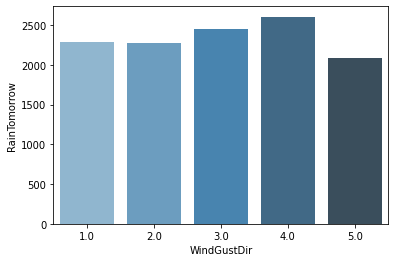

In [81]:
rainDirection =  d[d['RainTomorrow']==1].groupby('WindGustDir').count().reset_index().sort_values(by=['RainTomorrow'], ascending=False)
sns.barplot(x='WindGustDir',y='RainTomorrow',data=rainDirection.head(),palette='Blues_d')


# Rainy_locations = d[d['RainTomorrow']=='Yes'].groupby('Location').count().reset_index().sort_values(by=['RainTomorrow'], ascending=False)
# sns.barplot(y="Location", x='RainTomorrow', data=Rainy_locations.head(),palette='Blues_d')

In [85]:
d["WindGustDir"] = d["WindGustDir"].fillna(d["WindGustDir"].value_counts().index[0])
d["WindDir9am"] = d["WindDir9am"].fillna(d["WindDir9am"].value_counts().index[0])
d["WindDir3pm"] = d["WindDir3pm"].fillna(d["WindDir3pm"].value_counts().index[0])

In [86]:
d.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
DateTime         0
Year             0
Month            0
Day              0
dtype: int64

In [87]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  object        
 1   Location       142193 non-null  object        
 2   MinTemp        142193 non-null  float64       
 3   MaxTemp        142193 non-null  float64       
 4   Rainfall       142193 non-null  float64       
 5   Evaporation    142193 non-null  float64       
 6   Sunshine       142193 non-null  float64       
 7   WindGustDir    142193 non-null  float64       
 8   WindGustSpeed  142193 non-null  float64       
 9   WindDir9am     142193 non-null  float64       
 10  WindDir3pm     142193 non-null  float64       
 11  WindSpeed9am   142193 non-null  float64       
 12  WindSpeed3pm   142193 non-null  float64       
 13  Humidity9am    142193 non-null  float64       
 14  Humidity3pm    142193 non-null  float64       
 15  

In [89]:
import scipy.stats as stats

MinTemp


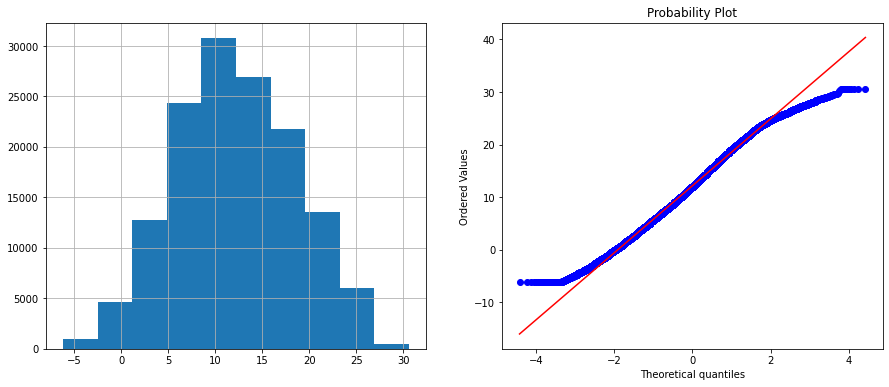

MaxTemp


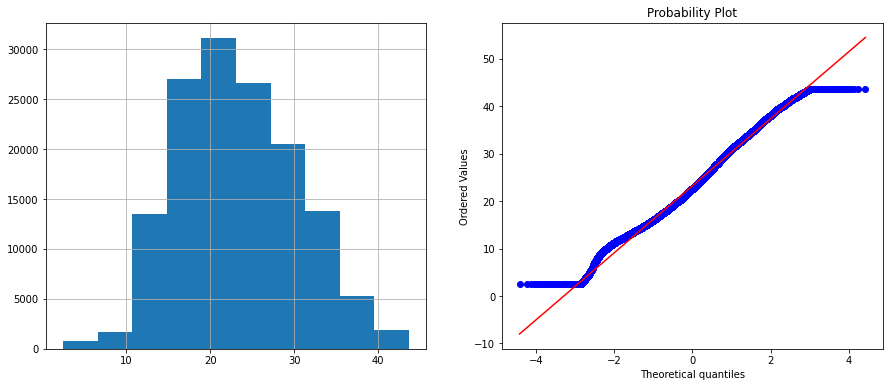

Rainfall


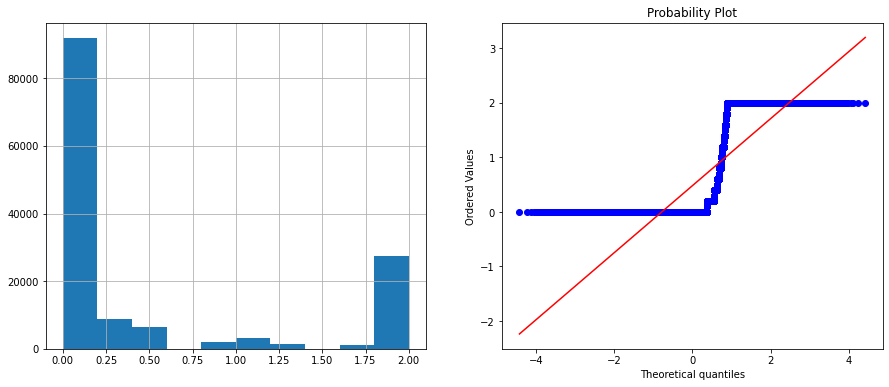

Evaporation


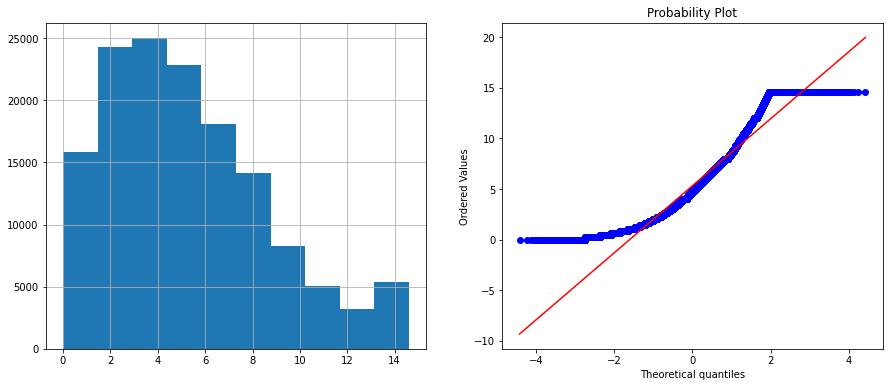

Sunshine


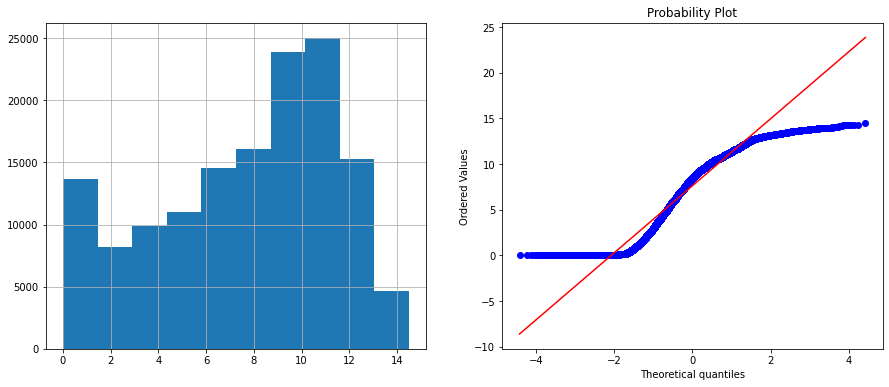

WindGustSpeed


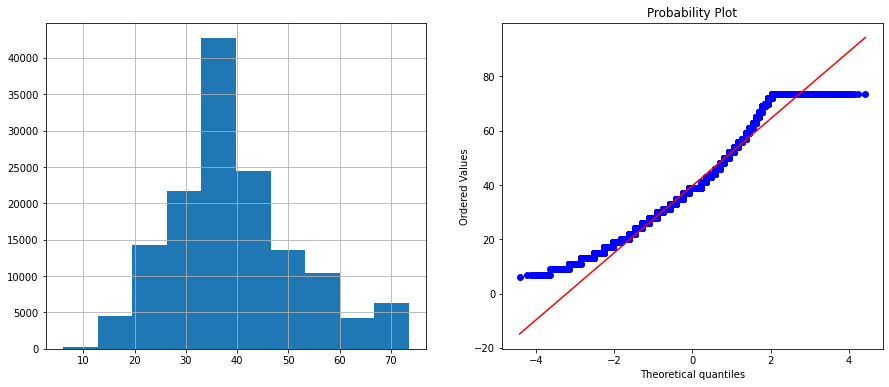

WindSpeed9am


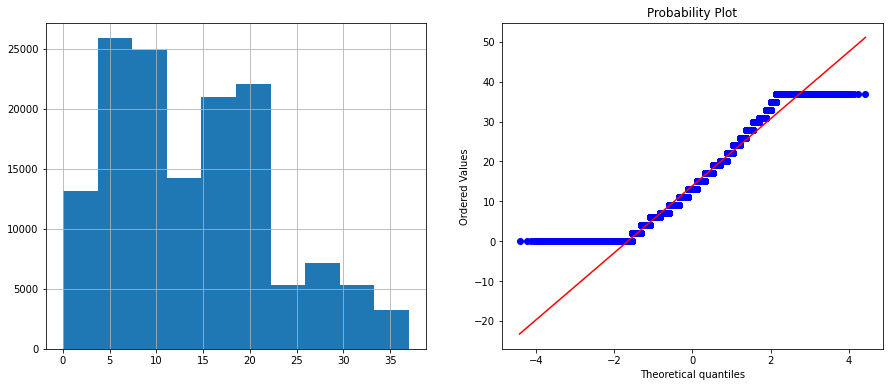

WindSpeed3pm


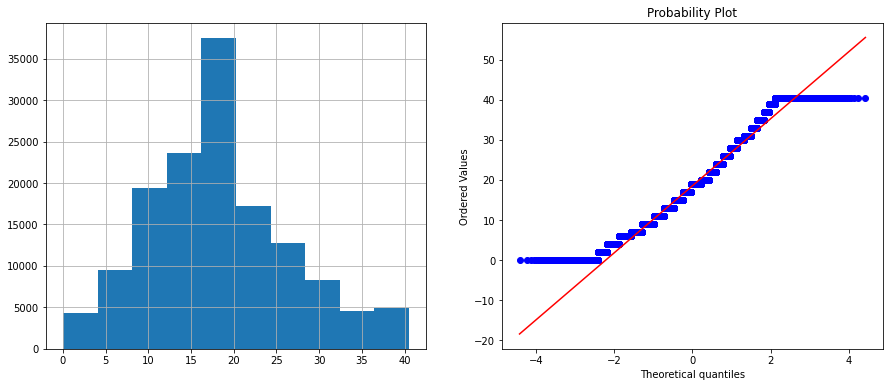

Humidity9am


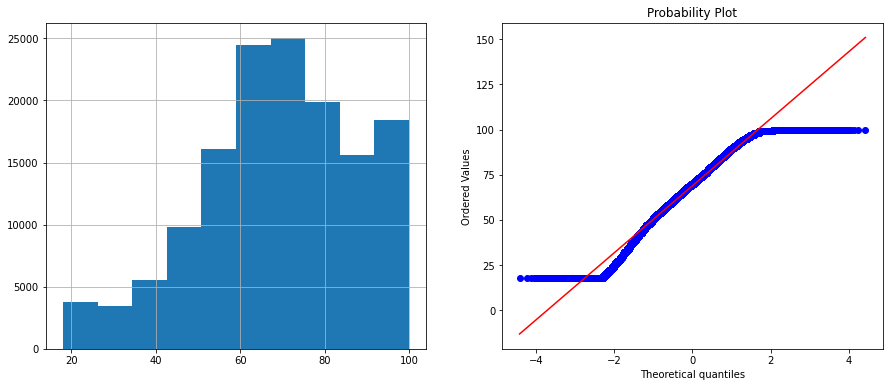

Humidity3pm


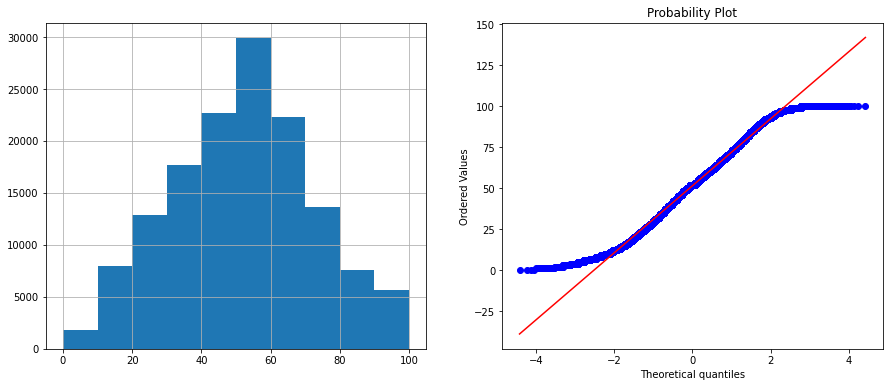

Pressure9am


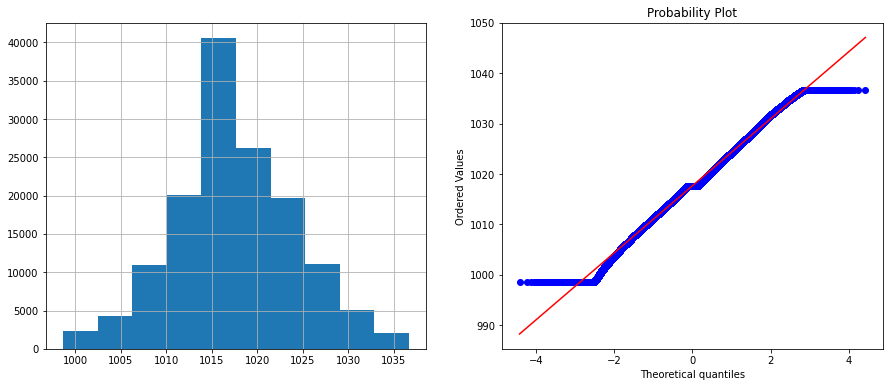

Pressure3pm


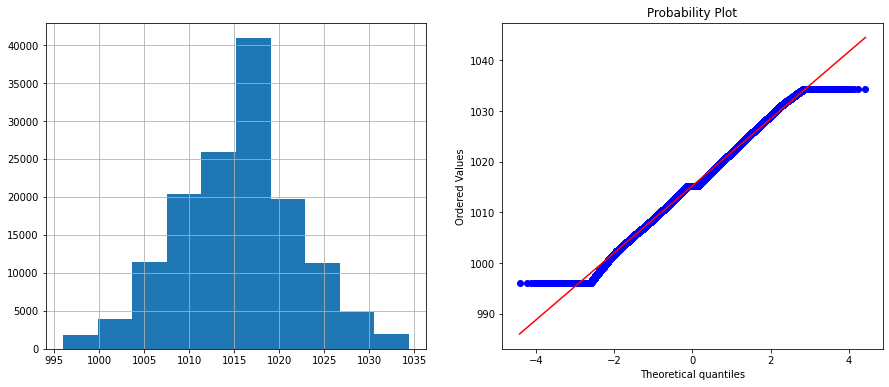

Temp9am


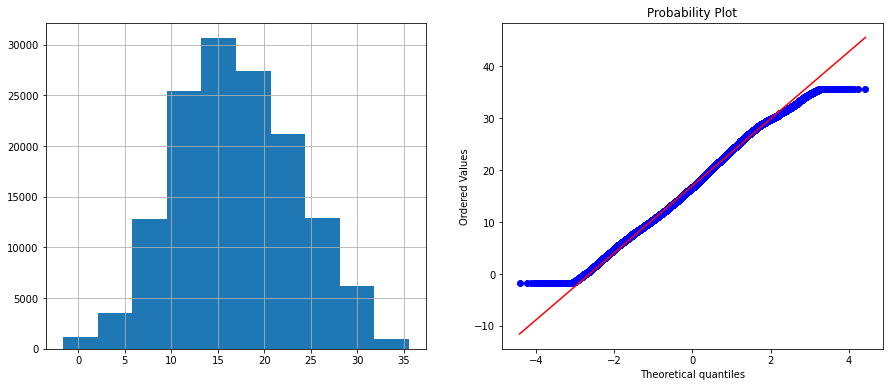

Temp3pm


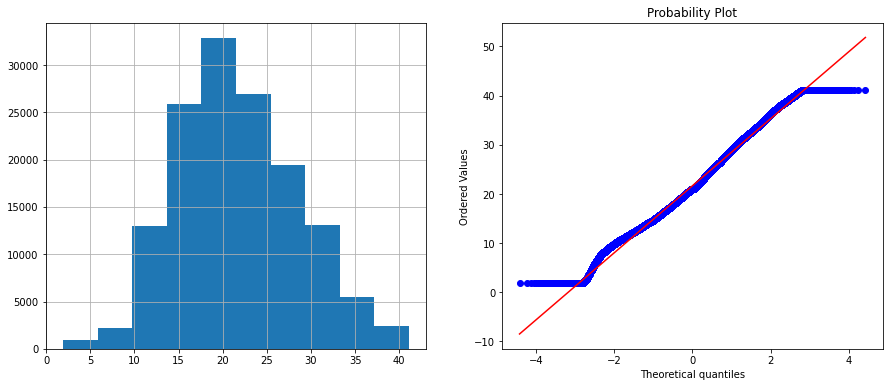

In [92]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    d[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(d[feature], dist="norm", plot=plt)
    plt.show()

In [93]:
from sklearn.model_selection import train_test_split


In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import preprocessing
#!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [101]:
le= preprocessing.LabelEncoder()

In [102]:
df1= d.copy()

In [104]:
for i in categorical_feature:
    df1[i] = le.fit_transform(df1[i])

In [105]:
df1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,DateTime,Year,Month,Day
0,2008-12-01,2,13.4,22.9,0.6,6.2,3.3,4,44.0,5,...,8.0,5.0,16.9,21.8,0,0,2008-12-01,2008,12,1
1,2008-12-02,2,7.4,25.1,0.0,0.4,6.1,2,44.0,0,...,5.0,1.0,17.2,24.3,0,0,2008-12-02,2008,12,2
2,2008-12-03,2,12.9,25.7,0.0,5.8,9.7,5,46.0,5,...,1.0,2.0,21.0,23.2,0,0,2008-12-03,2008,12,3
3,2008-12-04,2,9.2,28.0,0.0,1.4,12.2,11,24.0,13,...,7.0,7.0,18.1,26.5,0,0,2008-12-04,2008,12,4
4,2008-12-05,2,17.5,32.3,1.0,6.6,1.0,4,41.0,12,...,7.0,8.0,17.8,29.7,0,0,2008-12-05,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,41,3.5,21.8,0.0,14.6,6.6,15,31.0,14,...,7.0,7.0,9.4,20.9,0,0,2017-06-20,2017,6,20
142189,2017-06-21,41,2.8,23.4,0.0,1.0,11.4,15,31.0,13,...,1.0,8.0,10.1,22.4,0,0,2017-06-21,2017,6,21
142190,2017-06-22,41,3.6,25.3,0.0,6.7,2.4,0,22.0,13,...,7.0,0.0,10.9,24.5,0,0,2017-06-22,2017,6,22
142191,2017-06-23,41,5.4,26.9,0.0,5.6,0.0,3,37.0,13,...,0.0,8.0,12.5,26.1,0,0,2017-06-23,2017,6,23


In [128]:
X = df1.copy().drop(['RainTomorrow','Date','DateTime'],axis=1)

In [127]:
Y = df1['RainTomorrow']

In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [130]:
# X.shape
X

array([[-1.5270045 ,  0.19008391, -0.04631926, ..., -1.87267374,
         1.63358127, -1.6725261 ],
       [-1.5270045 , -0.74918215,  0.26388575, ..., -1.87267374,
         1.63358127, -1.55886545],
       [-1.5270045 ,  0.11181174,  0.34848712, ..., -1.87267374,
         1.63358127, -1.44520479],
       ...,
       [ 1.21224943, -1.34405065,  0.29208621, ...,  1.66889484,
        -0.11747999,  0.71434761],
       [ 1.21224943, -1.06227083,  0.51768985, ...,  1.66889484,
        -0.11747999,  0.82800826],
       [ 1.21224943, -0.68656441,  0.53179008, ...,  1.66889484,
        -0.11747999,  0.94166891]])

## Splitting into train and test

In [131]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size= 0.2 , random_state=41)

In [125]:
X_train

array([[-1.10558082,  1.53636526,  0.3907878 , ...,  1.27538722,
        -0.40932354,  0.94166891],
       [ 0.36940207,  0.36228269,  0.88429577, ..., -1.0856585 ,
        -0.99301062, -1.10422284],
       [ 1.35272399,  0.70668025,  0.84199509, ..., -0.69215088,
        -1.28485417,  0.82800826],
       ...,
       [ 0.79082575, -0.53002006, -0.86413246, ...,  0.09486436,
         0.46620709, -1.21788349],
       [-0.4734453 , -0.13865921, -0.21552199, ...,  0.8818796 ,
        -1.57669771,  0.14604434],
       [ 1.00153759, -0.5926378 , -0.72313019, ...,  0.48837198,
         0.17436355, -1.6725261 ]])

In [132]:
Y_train.shape


(113754,)

In [114]:
X_train.shape

(113754, 24)

In [122]:
Y_train.shape

(113754,)

In [116]:
smt = SMOTE()

X_train_sm, Y_train_sm = smt.fit_resample(X_train, Y_train)

In [117]:
X_train.shape

(113754, 24)

In [121]:
Y_train

87483     0
112325    0
124607    0
50816     0
62562     0
         ..
53491     0
106817    0
61324     1
132003    0
34752     0
Name: RainTomorrow, Length: 113754, dtype: int64

In [133]:
clf= RandomForestClassifier()

In [134]:
clf = clf.fit(X_train,Y_train)

In [143]:
y_predict = clf.predict(X_test)

In [146]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix
cm = confusion_matrix(y_test, y_predict)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[21100   955]
 [ 3220  3164]]

True Positives(TP) =  21100

True Negatives(TN) =  3164

False Positives(FP) =  955

False Negatives(FN) =  3220


<AxesSubplot:>

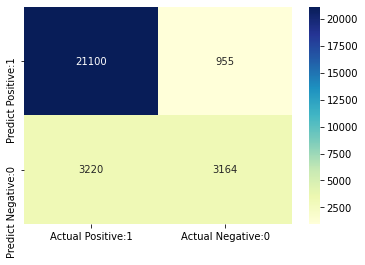

In [147]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [148]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22055
           1       0.77      0.50      0.60      6384

    accuracy                           0.85     28439
   macro avg       0.82      0.73      0.76     28439
weighted avg       0.85      0.85      0.84     28439

